<a href="https://colab.research.google.com/github/marcellels/dsrepo/blob/master/Analisando_a_Viol%C3%AAncia_Contra_a_Mulher_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Violência Contra a Mulher no Rio Grande do Sul

Frequentemente são reportados nos meios de comunicação notícias sobre a violência contra a mulher. Não importa aonde você esteja localizado, as atrocidades realizadas por parceiros ou mesmo por desconhecidos parece não ter fim.

O que é ainda pior, além de não terem fim, os índices continuam aumentando.

Neste notebook, será realizada uma avaliação do **cenário da violência contra a mulher no estado do Rio Grande do Sul**. Para maiores informações sobre os dados registrados no país, consulte o [Anuário Brasileiro de Segurança Pública de 2019]("http://www.forumseguranca.org.br/wp-content/uploads/2019/09/Anuario-2019-FINAL-v3.pdf).

<center><img alt="Munique" width="50%" src="https://images.unsplash.com/photo-1516302752625-fcc3c50ae61f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80"></center>


## Obtenção dos Dados

Os dados utilizados nesta análise foram obtidos através do site da [Secretaria da Segurança Pública]("https://ssp.rs.gov.br/indicadores-da-violencia-contra-a-mulher") do Rio Grande do Sul.

Ao longo do estudo, foram utilizados dois tipos de arquivos distintos.

O primeiro, é um compilado de informações de ocorrências de violência contra a mulher que aconteceram entre os anos de 2012 a 2019, mês a mês.

Os demais, que seguem o mesmo padrão, são divididos entre os tipos de ocorrência por município ao longo do ano de 2019 apenas.

In [250]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [251]:
# importar arquivos

# violência contra a mulher no RS entre 2012 e 2019
df = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/Dados_Violencia_Contra_Mulher_RS_2012_2019.csv", delimiter=";")
df.data = pd.to_datetime(df.data, format="%m-%Y")

# violência contra a mulher no RS em 2019 por município
df_ameaca = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/DF_2019_Ameaca.csv", delimiter=";",encoding='ISO-8859-1')
df_ameaca.set_index('CIDADES', inplace=True)
df_lesao = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/DF_2019_Lesao_Corporal.csv", delimiter=";",encoding='ISO-8859-1')
df_lesao.set_index('CIDADES', inplace=True)
df_estupro = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/DF_2019_Estupro.csv", delimiter=";",encoding='ISO-8859-1')
df_estupro.set_index('CIDADES', inplace=True)
df_fem = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/DF_2019_Feminicidio.csv", delimiter=";",encoding='ISO-8859-1')
df_fem.set_index('CIDADES', inplace=True)
df_femtent = pd.read_csv("https://raw.githubusercontent.com/marcellels/dsrepo/master/Database/Viol%C3%AAncia%20Contra%20a%20Mulher%20(RS)/DF_2019_Feminicidio_Tentativa.csv", delimiter=";",encoding='ISO-8859-1')
df_femtent.set_index('CIDADES', inplace=True)

## Análise Inicial dos Dados

Para uma melhor contextualização, será realizada uma breve análise do conjunto de dados para avaliar seu tamanho, sua consistência e determinar quais variáveis estarão disponíveis para trabalhar.

**A saber:**
- Feminicídio: Homicídio praticado contra vítima mulher por motivações baseadas em violência doméstica e/ou intrafamiliar, ou em caso de menosprezo ou discriminação pela condição de mulher.
- Estupro: O *dataset* considera os dados referentes a Estupro e Estupro de Vulnerável.

Primeiramente, portanto, determina-se o tamanho do *dataset*.

In [252]:
# identificar número de variáveis e entradas
print("Variáveis:\t", df.shape[1])
print("Entradas:\t", df.shape[0])

Variáveis:	 6
Entradas:	 96


Através desta avaliação, determinou-se que existem seis variáveis a serem trabalhadas. Desta forma, identifica-se quais são elas.

In [253]:
# identificar variáveis
df.columns

Index(['data', 'ameaca', 'lesao', 'estupro', 'feminicidio',
       'feminicidio_tentado'],
      dtype='object')

A seguir, verifica-se quais são os tipos de dados que cada uma dessas variáveis carrega e se será necessário fazer alguma conversão de tipo de variável para possibilitar a manipulação dos dados.

In [254]:
# verificar os tipos de variáveis
df.dtypes

data                   datetime64[ns]
ameaca                          int64
lesao                           int64
estupro                         int64
feminicidio                     int64
feminicidio_tentado           float64
dtype: object

Como a variável `data` já havia sido convertida durante a importação dos dados, não será necessário fazer outras alterações.

Para saber como as informações estão sendo dispostas no *DataFrame*, avalia-se as cinco primeiras entradas.

In [255]:
# exibir as 5 primeiras entradas
df.head()

,data,ameaca,lesao,estupro,feminicidio,feminicidio_tentado
0,2012-01-01,4271,2655,154,12,NaN
1,2012-02-01,4040,2571,108,14,NaN
2,2012-03-01,3912,2305,126,8,NaN
3,2012-04-01,3527,2055,85,5,NaN
4,2012-05-01,3617,2012,106,8,NaN


Por fim, para finalizar esta etapa inicial, é importante determinar ainda se existem muitos valores ausentes no *dataset*.

In [260]:
# determinar % de valores ausentes por coluna
(df.isnull().sum() / df.shape[0])*100

data                    0.0
ameaca                  0.0
lesao                   0.0
estupro                 0.0
feminicidio             0.0
feminicidio_tentado    12.5
dtype: float64

Conclui-se aqui que existem 12,5% de valores ausentes na variável `feminicidio_tentado`, o que corresponde a 12 linhas, como pode ser visto abaixo.

Este número de linhas equivale, portanto, a 12 meses de informações indisponíveis.

In [261]:
# mostrar o número de valores ausentes da variável feminicidio_tentado
print("Número de valores ausentes:", df.feminicidio_tentado.isnull().sum())

Número de valores ausentes: 12


Como os valores ausentes impossibilitam efetuar o somatório das ocorrências para 12 meses e não se deseja excluir estas informações do conjunto de dados, decidiu-se considerar que não foram registradas ocorrências durante o período. É importante ter em mente, no entanto, que devem haver outros motivos para a falta destas informações.

In [262]:
# substituir valores ausentes da variável feminicidio_tentado por 0
df = df.fillna({'feminicidio_tentado' : 0})

# incluir coluna total com o somatório das ocorrências
df['total'] = (df['ameaca'] + df['lesao'] + df['estupro'] + df['feminicidio'] + df['feminicidio_tentado'])


## Informações Estatísticas da Violência Contra a Mulher no RS entre 2012 e 2019


Nesta seção, será apresentada a análise estatística dos dados reportados entre os anos de 2012 e 2019. Alguns pontos que se tentará esclarecer incluem:
- Quantas ocorrências de violência contra a mulher foram reportadas durante o período?
- Qual é a ocorrência mais frequente?
- Em que período ocorreu o menor e o maior número de feminicídios no estado?
- A violência contra a mulher vem aumento ou diminuindo ao longo dos anos?
- Existe alguma relação entre o período do ano e a frequência de ocorrências?


O resumo estatístico contendo a média (mean), desvio padrão (std), mínimos (min) e máximos (max) observados e a mediana (50%) será apresentado a seguir.

In [264]:
# mostrar resumo estatístico do conjunto de dados
df.describe()

,ameaca,lesao,estupro,feminicidio,feminicidio_tentado,total
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,3427.250000,1997.562500,129.604167,7.90625,22.135417,5584.458333
std,442.620284,352.058542,24.314379,3.22842,10.868225,774.012334
min,2640.000000,1364.000000,83.000000,1.00000,0.000000,4224.000000
25%,3085.000000,1724.750000,109.750000,6.00000,17.000000,5021.250000
50%,3316.000000,1967.000000,126.500000,8.00000,23.000000,5477.000000
75%,3766.750000,2265.000000,143.500000,10.00000,29.250000,6124.750000
max,4537.000000,2975.000000,206.000000,16.00000,44.000000,7397.000000


Para responder às duas primeiras perguntas, será calculado o percentual de representação de cada tipo de variável.

In [303]:
# verificar o número total de ocorrências
print("Número total de ocorrências entre 2012 e 2019:", int(df.total.sum()))
print('')

# mostrar percentual total de violência contra a mulher entre 2012 e 2019
print("Percentual correspondente de cada tipo de ocorrência:")
print("Ameaça:\t\t\t", ((df.ameaca.sum()/df.total.sum())*100).round(2))
print("Lesão Corporal:\t\t", ((df.lesao.sum()/df.total.sum())*100).round(2))
print("Estupro:\t\t", ((df.estupro.sum()/df.total.sum())*100).round(2))
print("Tent. Feminicídio:\t", ((df.feminicidio_tentado.sum()/df.total.sum())*100).round(2))
print("Feminicídio:\t\t", ((df.feminicidio.sum()/df.total.sum())*100).round(2))

Número total de ocorrências entre 2012 e 2019: 536108

Percentual correspondente de cada tipo de ocorrência:
Ameaça:			 61.37
Lesão Corporal:		 35.77
Estupro:		 2.32
Tent. Feminicídio:	 0.4
Feminicídio:		 0.14


Como é possível observar, ao longos destes 8 anos o que mais foi reportado foram ameaças, seguido por lesão corporal, estupro, tentativa de feminicídio e, por fim, feminicídio.

Buscando os dados do resumo estatístico, percebe-se que o menor número de feminicídios executados foi de um caso em um mês e o maior foram 16 casos em um mesmo mês. Para responder à terceira questão levantada, verifica-se quando estas ocorrências foram efetuadas.

In [273]:
# mostrar período de menor número de feminicídios
df[df["feminicidio"] == 1]

,data,ameaca,lesao,estupro,feminicidio,feminicidio_tentado,total
85,2019-02-01,3214,1820,132,1,23.0,5190.0


In [274]:
# mostrar período de maior número de feminicídios
df[df["feminicidio"] == 16]

,data,ameaca,lesao,estupro,feminicidio,feminicidio_tentado,total
77,2018-06-01,2640,1441,110,16,17.0,4224.0
83,2018-12-01,3110,2222,117,16,22.0,5487.0


O mês com menor incidência de feminicídios foi, portanto, fevereiro de 2019. O maior número de incidências, por sua vez, ocorreu por duas vezes no mesmo ano, em 2018. Junho e dezembro deste ano foram os meses onde mais mulheres foram assassinadas.

Apesar deste alto resultado em 2018, a violência contra a mulher, de modo geral, tem ou não aumentado desde 2012?

### Visualização dos Dados

Para responder à pergunta levantada na seção anterior, será necessário analisar os dados ano a ano. 

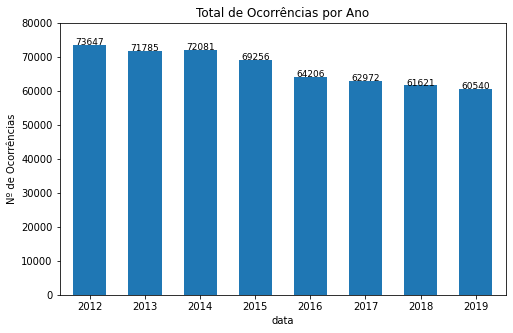

In [275]:
# plotar o gráfico para visualização
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Total de Ocorrências por Ano')
plt.xlabel('Ano')
plt.ylabel('Nº de Ocorrências')

ax = (df['total'].groupby(df.data.dt.to_period("Y")).agg('sum').plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 90000, 10000))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.1))

O gráfico obtido demonstra que as ocorrências vem gradualmente diminuindo ao longo dos anos, com exceção de 2014, que viu um certo aumento em relação ao ano anterior. 

Para determinar qual foi a variação entre 2012 e 2019 se procede com o cálculo das diferenças percentuais. Como pode se observar abaixo, este valor ficou em -2,45%.

In [276]:
# verificar variação percentual entre 2012 e 2019
ano_2012 = ((df['total'].groupby(df.data.dt.to_period("Y")).agg('sum')/df.total.sum())*100).round(2)[0]
ano_2019 = ((df['total'].groupby(df.data.dt.to_period("Y")).agg('sum')/df.total.sum())*100).round(2)[7]
print("Variação percentual da violência contra a mulher no RS entre 2012 e 2019: {:.2f}%".format(ano_2019-ano_2012))

Variação percentual da violência contra a mulher no RS entre 2012 e 2019: -2.45%


É correto, no entanto, afirmar que a violência contra a mulher vem realmente diminuindo?

Para garantir que este dado se comprova, será analisado a seguir caso a caso.

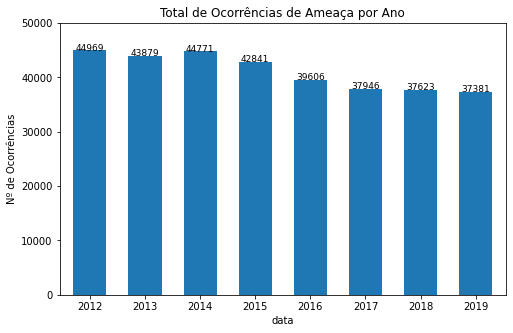

In [277]:
# plotar o gráfico da variável ameaça
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Total de Ocorrências de Ameaça por Ano')
plt.xlabel('Ano')
plt.ylabel('Nº de Ocorrências')

ax = (df['ameaca'].groupby(df.data.dt.to_period("Y")).agg('sum').plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 60000, 10000))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.1))

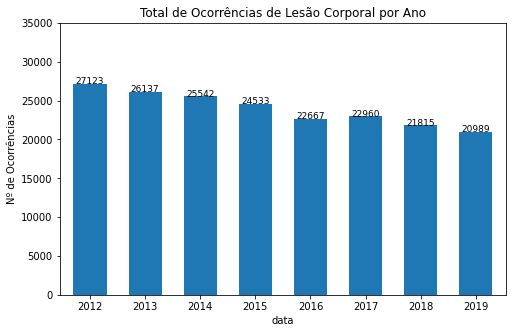

In [278]:
# plotar o gráfico da variável lesao
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Total de Ocorrências de Lesão Corporal por Ano')
plt.xlabel('Ano')
plt.ylabel('Nº de Ocorrências')

ax = (df['lesao'].groupby(df.data.dt.to_period("Y")).agg('sum').plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 40000, 5000))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.04, p.get_height()+0.1))

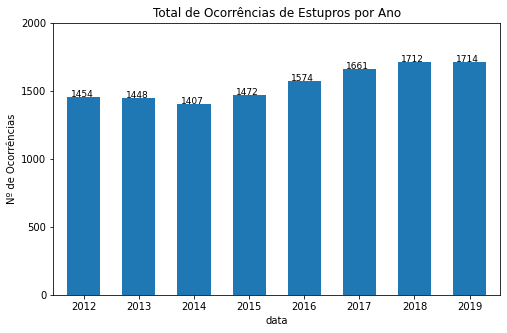

In [279]:
# plotar o gráfico da variável estupro
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Total de Ocorrências de Estupros por Ano')
plt.xlabel('Ano')
plt.ylabel('Nº de Ocorrências')

ax = (df['estupro'].groupby(df.data.dt.to_period("Y")).agg('sum').plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 2500, 500))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+0.1))

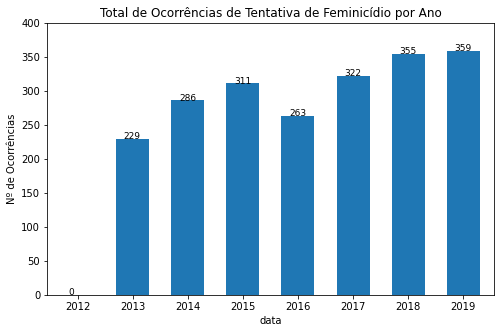

In [280]:
# plotar o gráfico da variável feminicidio_tentado
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Total de Ocorrências de Tentativa de Feminicídio por Ano')
plt.xlabel('Ano')
plt.ylabel('Nº de Ocorrências')

ax = (df['feminicidio_tentado'].groupby(df.data.dt.to_period("Y")).agg('sum').plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 450, 50))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.14, p.get_height()+0.1))

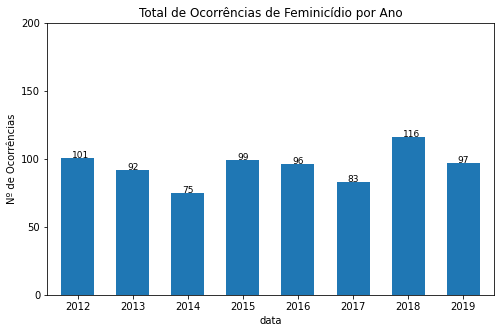

In [281]:
# plotar o gráfico da variável feminicidio
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Total de Ocorrências de Feminicídio por Ano')
plt.xlabel('Ano')
plt.ylabel('Nº de Ocorrências')

ax = (df['feminicidio'].groupby(df.data.dt.to_period("Y")).agg('sum').plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 250, 50))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+0.1))

Como é possível observar, num primeiro momento, ao agrupar todas as ocorrências, a conclusão a que se chegava era de que a violência estaria diminuindo, no entanto, após analisar caso a caso percebe-se que esta não é a realidade.

Existe sim uma diminuição nos números de ameaças e lesão corporal que, inclusive, são os casos que mais contabilizam notificações, porém as ocorrências mais graves como estupro e tentativa de feminicídio continuam crescendo. Os casos de feminicídio, por sua vez, variaram ao longo dos últimos 8 anos e não se pode afirmar que estão diminuindo, tanto que o ano de 2018 foi o responsável pelos maiores índices.

A última questão levantada era se existia alguma relação entre o período do ano e a violência contra a mulher. Para determinar se isto se comprova, será necessário agrupar todas as ocorrências por mês e avaliar.

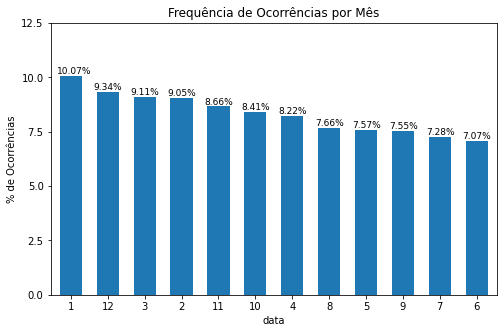

In [282]:
# plotar o gráfico de frequência de ocorrências por mês
plt.figure(figsize=(8,5))
plt.rc('font', size=9)
plt.rc('axes', titlesize=12)
plt.title('Frequência de Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('% de Ocorrências')

ax = (((df['total'].groupby(df.data.dt.month).agg('sum')/df['total'].sum())*100).round(2).sort_values(ascending=False).plot(kind='bar', rot=0, width=0.6))
ax.set_yticks(np.arange(0, 15, 2.5))

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+-0.08, p.get_height()+0.1))

Através do gráfico, nota-se que parece existir uma tendência um pouco maior de ocorrências durante o verão (dezembro a março) e uma tendência menor no inverno (junho a setembro).

## Informações Estatísticas da Violência Contra a Mulher no RS por Município em 2019

Agora que já foram avaliados os dados estatísticos consolidados da violência contra a mulher no RS, é interessante abordar quais são os principais municípios responsáveis pelos mais altos índices de ocorrências.

Conforme já explicado no início deste estudo, as bases de dados desta etapa se comportam da mesma forma, ou seja, são relações de municípios e o somatório de ocorrência por mês durante o ano de 2019. A única diferença entre eles é a quantidade de municípios que fazem parte do *dataset*.

Desta forma, serão realizadas as mesmas ações para cada *dataset* diferente, sendo elas:
- Avaliar as cinco primeiras entradas do *dataset*;
- Incluir uma coluna de soma de ocorrências ao longo do ano por município;
- Verificar o número de municípios presentes em cada *dataset*;
- Listar os 10 municípios com os maiores números de ocorrências.

O objetivo desta etapa é responder à seguinte pergunta:
- Quais os municípios onde mais são reportados casos de violência contra a mulher no RS de acordo com o tipo de ocorrência?

### Ameaça

In [283]:
# exibir as 5 primeiras entradas de Ameaça
df_ameaca.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
CIDADES,,,,,,,,,,,,
ACEGUA,0,0,0,1,1,0,0,0,0,1,1,0
AGUA SANTA,0,1,0,0,0,1,0,0,0,1,0,0
AGUDO,4,5,3,8,3,7,6,5,10,3,0,4
AJURICABA,1,2,2,3,4,3,0,1,0,1,1,1
ALECRIM,4,0,6,3,2,3,0,2,2,0,3,4


In [284]:
# adicionar coluna de total de ocorrências por município
df_ameaca['total'] = (df_ameaca['jan'] + df_ameaca['fev'] + df_ameaca['mar'] + df_ameaca['abr'] + df_ameaca['mai'] + df_ameaca['jun'] + 
                      df_ameaca['jul'] + df_ameaca['ago'] + df_ameaca['set'] + df_ameaca['out'] + df_ameaca['nov'] + df_ameaca['dez'])
df_ameaca.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
CIDADES,,,,,,,,,,,,,
ACEGUA,0,0,0,1,1,0,0,0,0,1,1,0,4
AGUA SANTA,0,1,0,0,0,1,0,0,0,1,0,0,3
AGUDO,4,5,3,8,3,7,6,5,10,3,0,4,58
AJURICABA,1,2,2,3,4,3,0,1,0,1,1,1,19
ALECRIM,4,0,6,3,2,3,0,2,2,0,3,4,29


In [285]:
# identificar número total de municípios e os 10 com maior percentual de ocorrências
print("Número de municípios no dataset:", df_ameaca.shape[0])
print('')
print("AMEAÇA")
print('')
print(((df_ameaca.total/df_ameaca.total.sum())*100).sort_values(ascending=False)[:10].round(2))

Número de municípios no dataset: 498

AMEAÇA

CIDADES
PORTO ALEGRE     10.92
CANOAS            3.57
CAXIAS DO SUL     3.41
SANTA MARIA       3.10
PASSO FUNDO       2.89
VIAMAO            2.58
PELOTAS           2.54
ALVORADA          2.38
GRAVATAI          2.32
NOVO HAMBURGO     2.17
Name: total, dtype: float64


### Lesão Coporal

In [286]:
# exibir as 5 primeiras entradas de Lesão
df_lesao.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
CIDADES,,,,,,,,,,,,
ACEGUA,0,0,0,1,0,2,1,1,0,1,0,0
AGUA SANTA,0,0,1,0,0,1,0,0,0,0,1,1
AGUDO,5,7,0,6,4,1,0,0,3,1,2,3
AJURICABA,1,0,2,1,0,1,2,1,1,2,4,0
ALECRIM,1,0,1,0,0,1,2,0,3,0,1,0


In [287]:
# adicionar coluna de total de ocorrências por município
df_lesao['total'] = (df_lesao['jan'] + df_lesao['fev'] + df_lesao['mar'] + df_lesao['abr'] + df_lesao['mai'] + df_lesao['jun'] + 
                      df_lesao['jul'] + df_lesao['ago'] + df_lesao['set'] + df_lesao['out'] + df_lesao['nov'] + df_lesao['dez'])
df_lesao.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
CIDADES,,,,,,,,,,,,,
ACEGUA,0,0,0,1,0,2,1,1,0,1,0,0,6
AGUA SANTA,0,0,1,0,0,1,0,0,0,0,1,1,4
AGUDO,5,7,0,6,4,1,0,0,3,1,2,3,32
AJURICABA,1,0,2,1,0,1,2,1,1,2,4,0,15
ALECRIM,1,0,1,0,0,1,2,0,3,0,1,0,9


In [288]:
# identificar número total de municípios e os 10 com maior percentual de ocorrências
print("Número de municípios no dataset:", df_lesao.shape[0])
print('')
print("LESÃO")
print('')
print(((df_lesao.total/df_lesao.total.sum())*100).sort_values(ascending=False)[:10].round(2))

Número de municípios no dataset: 498

LESÃO

CIDADES
PORTO ALEGRE     16.77
CANOAS            3.60
CAXIAS DO SUL     3.56
SANTA MARIA       3.55
PELOTAS           3.27
PASSO FUNDO       2.66
VIAMAO            2.53
GRAVATAI          2.35
RIO GRANDE        2.24
SAO LEOPOLDO      2.21
Name: total, dtype: float64


### Estupro

In [289]:
# exibir as 5 primeiras entradas de Estupro
df_estupro.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
CIDADES,,,,,,,,,,,,
ACEGUA,0,0,0,0,0,0,0,0,0,0,0,0
AGUA SANTA,0,0,0,0,0,0,0,0,0,0,0,0
AGUDO,0,0,0,1,0,0,0,0,2,1,1,1
AJURICABA,0,0,0,0,0,0,0,0,0,0,0,0
ALECRIM,0,0,1,0,1,0,0,0,0,0,0,0


In [290]:
# adicionar coluna de total de ocorrências por município
df_estupro['total'] = (df_estupro['jan'] + df_estupro['fev'] + df_estupro['mar'] + df_estupro['abr'] + df_estupro['mai'] + df_estupro['jun'] + 
                      df_estupro['jul'] + df_estupro['ago'] + df_estupro['set'] + df_estupro['out'] + df_estupro['nov'] + df_estupro['dez'])
df_estupro.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
CIDADES,,,,,,,,,,,,,
ACEGUA,0,0,0,0,0,0,0,0,0,0,0,0,0
AGUA SANTA,0,0,0,0,0,0,0,0,0,0,0,0,0
AGUDO,0,0,0,1,0,0,0,0,2,1,1,1,6
AJURICABA,0,0,0,0,0,0,0,0,0,0,0,0,0
ALECRIM,0,0,1,0,1,0,0,0,0,0,0,0,2


In [291]:
# identificar número total de municípios e os 10 com maior percentual de ocorrências
print("Número de municípios no dataset:", df_estupro.shape[0])
print('')
print("ESTUPRO")
print('')
print(((df_estupro.total/df_estupro.total.sum())*100).sort_values(ascending=False)[:10].round(2))

Número de municípios no dataset: 498

ESTUPRO

CIDADES
PORTO ALEGRE     14.41
CANOAS            4.96
VIAMAO            4.61
ALVORADA          3.97
SANTA MARIA       3.79
GRAVATAI          3.15
NOVO HAMBURGO     3.09
SAO LEOPOLDO      2.68
PELOTAS           2.51
URUGUAIANA        2.39
Name: total, dtype: float64


### Tentativa de Feminicídio

In [292]:
# exibir as 5 primeiras entradas de Tentativa de Feminicídio
df_femtent.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
CIDADES,,,,,,,,,,,,
ALEGRETE,0,0,1,0,1,0,0,0,0,0,0,0
ALPESTRE,0,0,0,0,0,0,0,0,1,0,0,0
ALVORADA,1,0,0,1,0,2,0,1,1,1,0,0
ANTA GORDA,0,0,0,0,0,0,0,0,0,1,0,0
ARARICA,0,0,0,0,0,1,0,0,0,0,0,0


In [293]:
# adicionar coluna de total de ocorrências por município
df_femtent['total'] = (df_femtent['jan'] + df_femtent['fev'] + df_femtent['mar'] + df_femtent['abr'] + df_femtent['mai'] + df_femtent['jun'] + 
                      df_femtent['jul'] + df_femtent['ago'] + df_femtent['set'] + df_femtent['out'] + df_femtent['nov'] + df_femtent['dez'])
df_femtent.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
CIDADES,,,,,,,,,,,,,
ALEGRETE,0,0,1,0,1,0,0,0,0,0,0,0,2
ALPESTRE,0,0,0,0,0,0,0,0,1,0,0,0,1
ALVORADA,1,0,0,1,0,2,0,1,1,1,0,0,7
ANTA GORDA,0,0,0,0,0,0,0,0,0,1,0,0,1
ARARICA,0,0,0,0,0,1,0,0,0,0,0,0,1


In [294]:
# identificar número total de municípios e os 10 com maior percentual de ocorrências
print("Número de municípios no dataset:", df_femtent.shape[0])
print('')
print("TENTATIVA DE FEMINICÍDIO")
print('')
print(((df_femtent.total/df_femtent.total.sum())*100).sort_values(ascending=False)[:10].round(2))

Número de municípios no dataset: 117

TENTATIVA DE FEMINICÍDIO

CIDADES
PORTO ALEGRE             17.83
SAO LEOPOLDO              5.57
PASSO FUNDO               5.57
VIAMAO                    4.46
SANTANA DO LIVRAMENTO     3.62
PELOTAS                   2.51
SANTA MARIA               2.51
CAXIAS DO SUL             2.23
CANOAS                    2.23
GRAVATAI                  1.95
Name: total, dtype: float64


### Feminicídio

In [295]:
# exibir as 5 primeiras entradas de Feminicídio
df_fem.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
CIDADES,,,,,,,,,,,,
ALEGRETE,0,0,0,1,0,0,0,0,0,0,0,0
ALVORADA,0,0,0,0,0,0,1,0,0,0,1,0
BENTO GONCALVES,0,0,0,0,0,0,1,1,0,0,1,0
BOM JESUS,0,0,0,0,0,0,1,0,0,0,0,1
BOM RETIRO DO SUL,0,0,0,0,0,0,0,0,1,0,0,0


In [296]:
# adicionar coluna de total de ocorrências por município
df_fem['total'] = (df_fem['jan'] + df_fem['fev'] + df_fem['mar'] + df_fem['abr'] + df_fem['mai'] + df_fem['jun'] + 
                      df_fem['jul'] + df_fem['ago'] + df_fem['set'] + df_fem['out'] + df_fem['nov'] + df_fem['dez'])
df_fem.head()

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez,total
CIDADES,,,,,,,,,,,,,
ALEGRETE,0,0,0,1,0,0,0,0,0,0,0,0,1
ALVORADA,0,0,0,0,0,0,1,0,0,0,1,0,2
BENTO GONCALVES,0,0,0,0,0,0,1,1,0,0,1,0,3
BOM JESUS,0,0,0,0,0,0,1,0,0,0,0,1,2
BOM RETIRO DO SUL,0,0,0,0,0,0,0,0,1,0,0,0,1


In [297]:
# identificar número total de municípios e os 10 com maior percentual de ocorrências
print("Número de municípios no dataset:", df_fem.shape[0])
print('')
print("FEMINICÍDIO")
print('')
print(((df_fem.total/df_fem.total.sum())*100).sort_values(ascending=False)[:10].round(2))

Número de municípios no dataset: 69

FEMINICÍDIO

CIDADES
PORTO ALEGRE       6.19
CAXIAS DO SUL      4.12
SANTA MARIA        4.12
PASSO FUNDO        3.09
PELOTAS            3.09
URUGUAIANA         3.09
BENTO GONCALVES    3.09
LAJEADO            2.06
GRAVATAI           2.06
ALVORADA           2.06
Name: total, dtype: float64


### Visualização dos Dados

Agora que já foi determinado percentualmente os 10 principais municípios responsáveis por cada tipo de ocorrência, serão plotados a seguir estes resultados para melhor visualização. Os gráficos, no entanto, consideram os números absolutos de ocorrência e não seus percentuais.

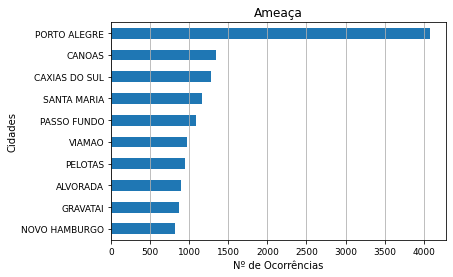

In [298]:
fig, ax2 = plt.subplots()

df_ameaca.total.sort_values(ascending=True)[488:498].plot(kind='barh',ax=ax2, fontsize=9, title="Ameaça")
ax2.grid(axis='x')
plt.xlabel('Nº de Ocorrências');
plt.ylabel('Cidades');

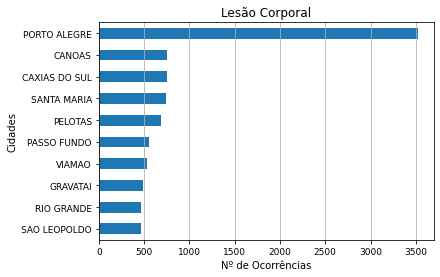

In [299]:
fig, ax2 = plt.subplots()

df_lesao.total.sort_values(ascending=True)[488:498].plot(kind='barh',ax=ax2, fontsize=9, title="Lesão Corporal")
ax2.grid(axis='x')
plt.xlabel('Nº de Ocorrências');
plt.ylabel('Cidades');

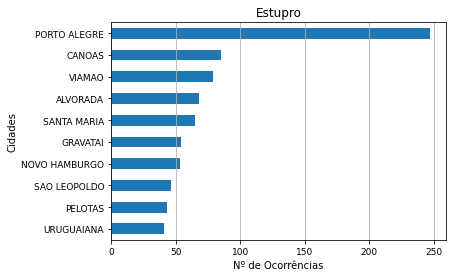

In [300]:
fig, ax2 = plt.subplots()

df_estupro.total.sort_values(ascending=True)[488:498].plot(kind='barh',ax=ax2, fontsize=9, title="Estupro")
ax2.grid(axis='x')
plt.xlabel('Nº de Ocorrências');
plt.ylabel('Cidades');

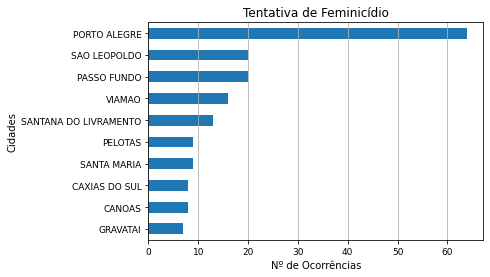

In [301]:
fig, ax2 = plt.subplots()

df_femtent.total.sort_values(ascending=True)[107:117].plot(kind='barh',ax=ax2, fontsize=9, title="Tentativa de Feminicídio")
ax2.grid(axis='x')
plt.xlabel('Nº de Ocorrências');
plt.ylabel('Cidades');

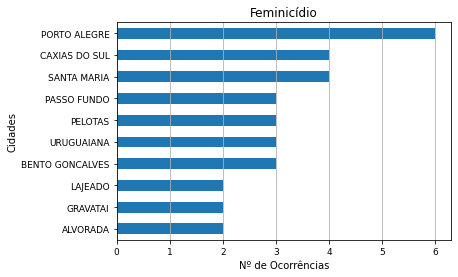

In [302]:
fig, ax2 = plt.subplots()

df_fem.total.sort_values(ascending=True)[59:69].plot(kind='barh',ax=ax2, fontsize=9, title="Feminicídio")
ax2.grid(axis='x')
plt.xlabel('Nº de Ocorrências');
plt.ylabel('Cidades');

Conforme o esperado, o município que está em primeiro lugar em todos os tipos de ocorrência é Porto Alegre, capital do Rio Grande do Sul e cidade com o maior número de habitantes do estado.

Focando nas cinco principais cidades de cada lista, a segunda que mais se repete é Caxias do Sul, com quatro recorrências, ficando de fora apenas da relação de Tentativa de Feminicídio, onde aparece em 8º lugar. Em seguida, Canoas aparece três vezes, sempre na segunda colocação para as ocorrências de Ameaça, Lesão Corporal e Estupro.

## Conclusão

Através da análise realizada, foi possível responder a algumas questões levantadas e entender melhor o cenário da violência contra a mulher no Rio Grande do Sul.

Entre os anos de 2012 e 2019, foram registrados 536.108 notificações de algum tipo de violência no estado, das quais a mais frequente delas foi ameaça (61,37%), seguida por lesão corporal (35,77%), estupro (2,32%), tentativa de feminicídio (0,40%) e feminicídio (0,14%).

As maiores ocorrências de feminicídio aconteceram no ano de 2018, não apenas em números absolutos, que somaram 116 casos, como também mensal, onde dois meses deste ano somaram 16 casos cada.

Conforme pôde ser visto ao longo do estudo, num primeiro momento poderia se concluir que o número de ocorrências estava diminuindo, porém isso só se comprovou para os registros de ameaça e lesão corporal, os crimes mais graves não mostraram indícios de estarem decaindo.

Curiosamente, ao longo dos oito anos avaliados, notou-se uma tendência maior de ocorrências durante o período do verão e uma menor tendência no período do inverno.

Por fim, com relação aos municípios do estado e de acordo com a base de dados do ano de 2019, a capital gaúcha, Porto Alegre, está bem à frente das demais cidades quando o assunto é a violência contra a mulher. Neste caso, seria interessante fazer uma avaliação mais aprofundada para avaliar a distribuição incluindo a população de cada município.

Como pode-se ver, os números são altos e continuam crescendo. É importante considerar, além de tudo que foi apresentado, que muitos casos de violência contra a mulher não são nem ao menos reportados, ou seja, o problema é ainda maior. 

Como reflexão, fica a informação publicada pela [GaúchaZH]("https://gauchazh.clicrbs.com.br/seguranca/noticia/2020/03/casos-de-feminicidios-aumentam-no-rs-ck7pbyary03yz01oalwvuz0ou.html") em março de 2020: *apenas quatro das 97 vítimas de feminicídio ocorrido em 2019 contavam com medida protetiva de urgência (MPU).*

